In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\hand_landmarks_data.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [56]:
df.shape

(25675, 64)

In [4]:
classes=df['label'].value_counts()
classes

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

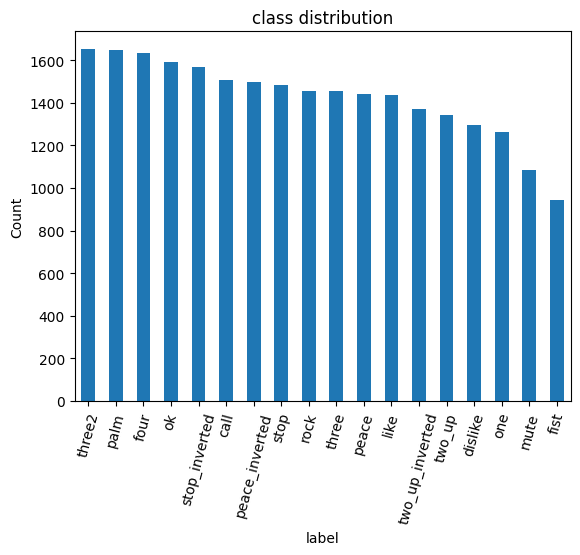

In [58]:
classes.plot(kind='bar')
plt.title('class distribution')
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

In [59]:
df["label"].nunique()

18

In [3]:
unique_gestures = df["label"].unique()
unique_gestures

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

In [4]:
connections = [
                 (0,1),   (1,2),   (2,3),    (3,4),     #thumb
                 (0,5),   (5,6),   (6,7),    (7,8),     #index finger
                 (5,9),   (9,10),  (10,11),  (11,12),   #middle finger
                 (9,13),  (13,14), (14,15),  (15,16),   #ring finger
                 (13,17), (0,17),  (17,18), (18,19),  (19,20)    #pinky

]

In [5]:
def plot_gesture (ax, landmarks, label):
    points = landmarks.reshape(21, 3)
    x = points[:, 0]
    y = points[:, 1]

    ax.scatter(x, y, c='red')

    for connection in connections:
        ax.plot([x[connection[0]], x[connection[1]]],
                [y[connection[0]], y[connection[1]]])

    ax.invert_yaxis()  
    ax.set_title(f"Label: {label}")
    ax.axis('equal')



### Visualizing one sample from each class

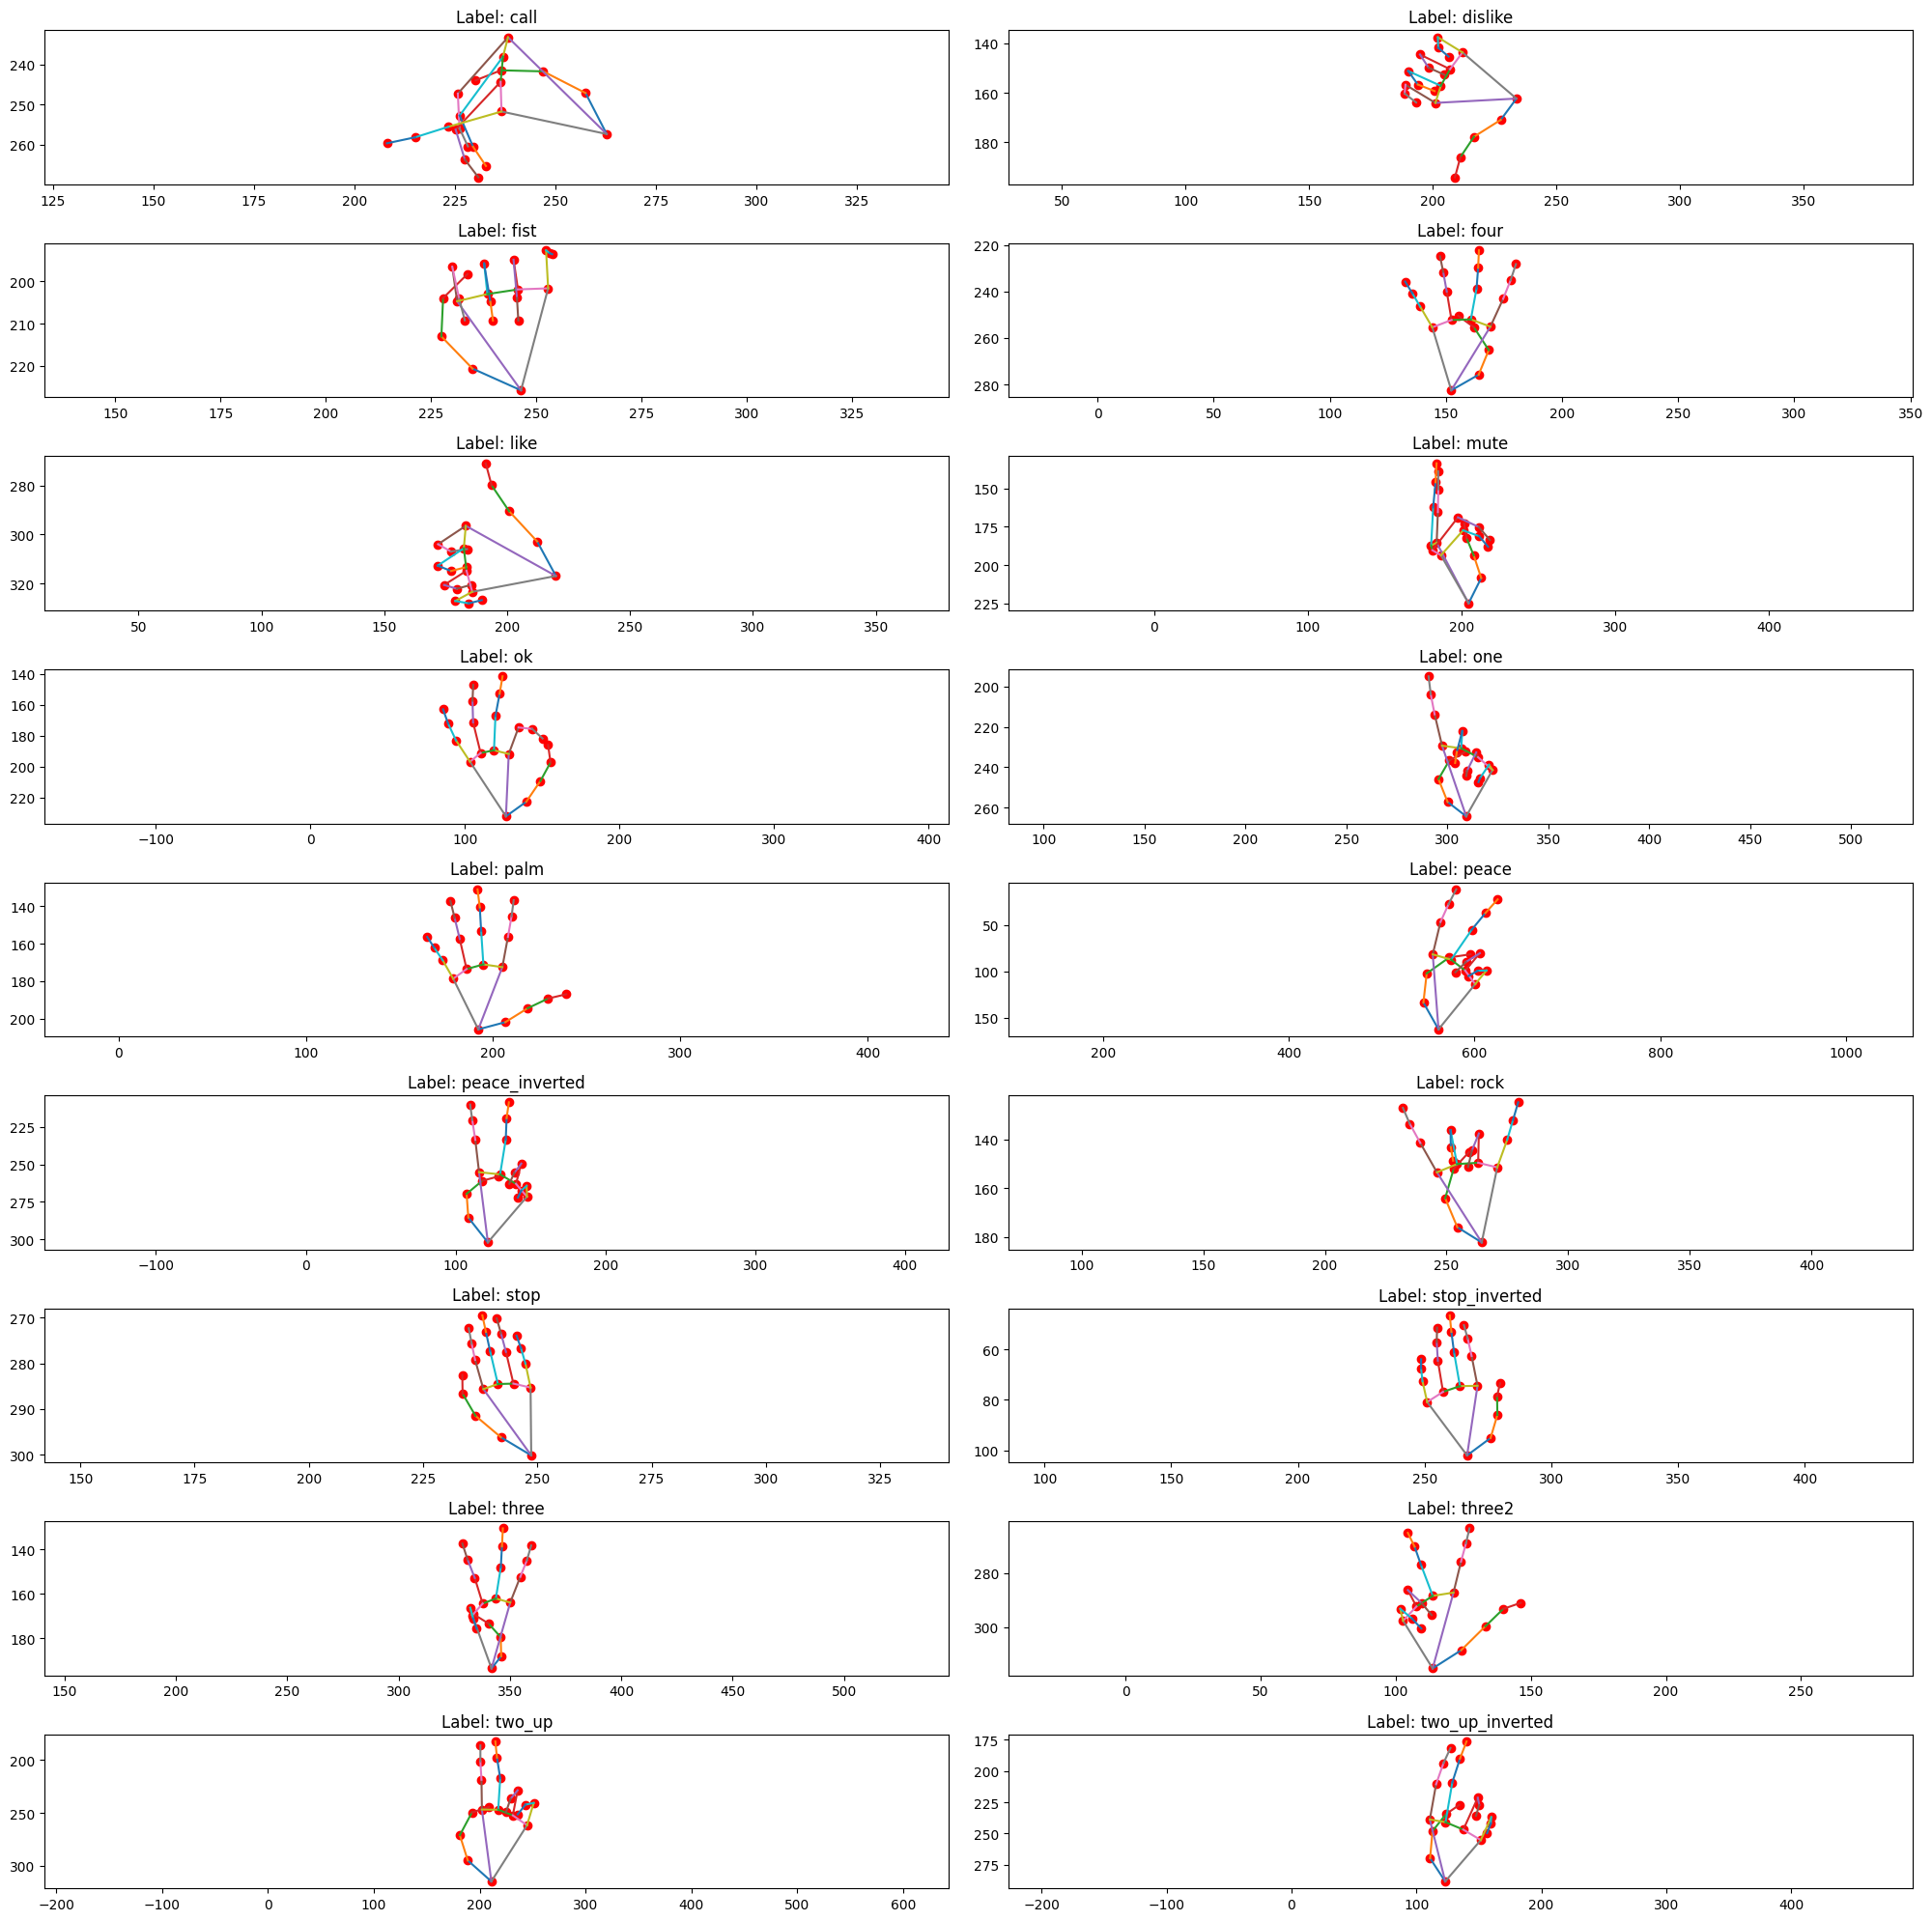

In [63]:
fig,axes = plt.subplots(9,2,figsize=(20,20))
axes = axes.flatten()

for i, label in enumerate(unique_gestures):
  sample = df[ df["label"]==label].iloc[0, :-1].values
  plot_gesture(axes[i], sample, label)

plt.tight_layout()
plt.show()


### Data Preprocessing

In [64]:
df.isnull().values.any()

np.False_

#### Normalizing landmarks

In [5]:
wrist_x = df["x1"]
wrist_y = df["y1"]
wrist_x

0        262.669968
1         83.351778
2        187.756977
3        114.976696
4        188.795288
            ...    
25670    259.135620
25671     90.063995
25672    236.724518
25673    119.466957
25674    484.605038
Name: x1, Length: 25675, dtype: float64

In [6]:
df["x13"]

0        232.641357
1        114.183495
2        231.852882
3        134.968494
4        212.064911
            ...    
25670    246.498070
25671     94.486073
25672    227.140320
25673    143.357220
25674    496.038434
Name: x13, Length: 25675, dtype: float64

In [6]:
def preprocess_landmarks(df):
    
        ## Recenter (x,y) landmarks using wrist point as origin (0,0) (Landmark 0 x1,y1)
        ## Scaling the landmarks by dividing them by the middle finger tip position
        wrist_x = df["x1"]
        wrist_y = df["y1"]
        mid_tip_x = df["x13"]
        mid_tip_y = df["y13"]

        for i in range(1,22):
            df[f"x{i}"] = df[f"x{i}"] - wrist_x
            df[f"y{i}"] = df[f"y{i}"] - wrist_y

            df[f"x{i}"] = df[f"x{i}"] / mid_tip_x
            df[f"y{i}"] = df[f"y{i}"] / mid_tip_y

        
        return df

preprocessed_df = preprocess_landmarks(df)
preprocessed_df.head()



,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.022577,-0.038439,0.004224,-0.067860,-0.058768,0.005798,-0.112987,...,-0.169036,-0.006840,-0.020450,-0.204721,0.003053,-0.024577,-0.234969,0.008685,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.012495,-0.053144,-0.011102,0.058926,-0.104862,-0.021096,0.107634,...,0.430008,-0.012953,-0.038175,0.520406,-0.009810,-0.037336,0.604990,-0.009243,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.033226,-0.073739,-0.000184,0.084116,-0.143944,-0.009687,0.119285,...,0.269757,0.032943,-0.044068,0.322050,0.043470,-0.040469,0.367617,0.047390,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.003506,-0.034615,-0.002824,0.012299,-0.067426,-0.008911,0.020067,...,0.223895,-0.007010,-0.027622,0.267296,-0.005898,-0.027863,0.303876,-0.006411,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.001294,-0.110079,-0.002884,0.015031,-0.245373,-0.008115,0.017717,...,0.178724,-0.075604,-0.025113,0.217087,-0.088218,-0.024087,0.248945,-0.105848,-0.023486,call


### Encode Labels (Convert text  to numbers)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
preprocessed_df["label"] = label_encoder.fit_transform(preprocessed_df["label"])
preprocessed_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.022577,-0.038439,0.004224,-0.067860,-0.058768,0.005798,-0.112987,...,-0.169036,-0.006840,-0.020450,-0.204721,0.003053,-0.024577,-0.234969,0.008685,-0.026722,0
1,0.0,0.0,-2.345265e-07,-0.012495,-0.053144,-0.011102,0.058926,-0.104862,-0.021096,0.107634,...,0.430008,-0.012953,-0.038175,0.520406,-0.009810,-0.037336,0.604990,-0.009243,-0.036136,0
2,0.0,0.0,-2.417307e-07,0.033226,-0.073739,-0.000184,0.084116,-0.143944,-0.009687,0.119285,...,0.269757,0.032943,-0.044068,0.322050,0.043470,-0.040469,0.367617,0.047390,-0.038301,0
3,0.0,0.0,-1.233261e-07,-0.003506,-0.034615,-0.002824,0.012299,-0.067426,-0.008911,0.020067,...,0.223895,-0.007010,-0.027622,0.267296,-0.005898,-0.027863,0.303876,-0.006411,-0.027723,0
4,0.0,0.0,-1.622995e-07,-0.001294,-0.110079,-0.002884,0.015031,-0.245373,-0.008115,0.017717,...,0.178724,-0.075604,-0.025113,0.217087,-0.088218,-0.024087,0.248945,-0.105848,-0.023486,0


In [8]:
df.shape

(25675, 64)

### Train/Test Split

In [9]:
features = preprocessed_df.drop(["label"],axis=1)
labels = preprocessed_df["label"]

In [10]:
from sklearn.model_selection import train_test_split

features_train, features_dev_test, labels_train, labels_dev_test = train_test_split(    features, labels , test_size=0.4, random_state=42 )
features_dev, features_test , labels_dev, labels_test = train_test_split(features_dev_test,labels_dev_test,test_size=0.5,random_state=42)

print("features_train:" ,len(features_train))
print("Validation features:", len(features_dev))
print("Testing features:", len(features_test))
print(len(labels_train))
print(len(labels_dev))
print(len(labels_test))


features_train: 15405
Validation features: 5135
Testing features: 5135
15405
5135
5135


In [11]:
# 60% for training, 20% for validation and 20% for testing

df_train, df_dev_test = train_test_split(preprocessed_df, test_size=0.4, random_state=42)


df_dev , df_test = train_test_split(df_dev_test, test_size=0.5, random_state=42)

df_train.to_csv('train.csv', index=False)
df_dev.to_csv('val.csv', index=False)
df_test.to_csv('test.csv', index=False)

print(f"Training: {len(df_train)}, Validation: {len(df_dev)}, Testing: {len(df_test)}")

Training: 15405, Validation: 5135, Testing: 5135
